# Load and initialize

settings

In [1]:
# dir="~/Desktop/biology/breast_cancer/data/"
# ubunto:
# old samples
dir1="~/Dropbox/CyTOF_Breast/Kaplan_1st/data/"
# new samples
dir2 = '~/Dropbox/CyTOF_Breast/Kaplan_2nd/data_afterGating/processed data/'
dir3 = '~/Dropbox/CyTOF_Breast/Kaplan_3rd/data/'
dir4 = '~/Dropbox/CyTOF_Breast/Kaplan_4th/data/'
dir5 = '~/Dropbox/CyTOF_Breast/Kaplan_5th/data/'


# show figures (figures are created and saved to file)
show = True
# create plot visualizations
visualize = False
# subsample = True
HistFit = False

# plt.savefig("test.svg", format="svg")
saveSVG = False

adjusted = True


envirement

In [2]:

import time 
start = time.process_time()
import os
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
import datetime 
date = datetime.date.today().strftime("%d%m%Y")

import sys
from IPython.display import Image, display
# from tqdm import tqdm_notebook,tqdm
# import time

import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
# import matplotlib.patches as  mpatches
plt.rcParams["figure.figsize"] = (5.0, 4.0)  # Set default size of plots.
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 180) #according to screen width
# from pandas.core.base import PandasObject
# PandasObject.view = view #allows view meth pd.view

# from scipy import signal, stats
import seaborn as sns

# from sklearn import metrics
# from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
# from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
# from sklearn.metrics import silhouette_samples,silhouette_score
# from sklearn.neighbors import kneighbors_graph

from lmfit import minimize, Parameters
# from umap import UMAP

# import scanpy as sc
# import anndata

# import schist as scs

# import networkx as nx

# from castle.common import GraphDAG
# from castle.metrics import MetricsDAG
# from castle.datasets import IIDSimulation, DAG
# from castle.algorithms import PC,Notears,GOLEM,ANMNonlinear,DirectLiNGAM,ICALiNGAM,NotearsLowRank
# import notears.notears as notears

# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon

# import keras
# from keras import layers
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint

# from statsmodels.graphics._regressionplots_doc import _plot_influence_doc
# from statsmodels.regression.linear_model import OLS
# from statsmodels.stats.outliers_influence import variance_inflation_factor

from pandas import MultiIndex, Int16Dtype
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
import pathlib
sys.path.append(f'{str(pathlib.Path.home())}/Desktop/breast_cancer_PHD_research/functions/old_files/')

# sys.path.append(parent_dir+'/functions/old_files/')
from plot_functions import *
from usefull_functions import *
from preprocess_functions import *
from functions import *
from impute_functions import *
# from normalization import *
from equalize_distributions import *


%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

dir_data = f'{str(pathlib.Path.home())}/Desktop/Data/'
dir_indexes =  f'{str(pathlib.Path.home())}/Dropbox/CyTOF_Breast/data_yishai/indexes/'
# dir_indexes = parent_dir + '/indexes/'

# dir_indexes = os.path.abspath(os.path.join(parent_dir, os.pardir))+'/indexes/'

# plot dir
dir_plots = f'{str(pathlib.Path.home())}/Desktop/_preproccess_{date}/'

# dir_plots = parent_dir+'/Plots_preproccess/'
settings =        (dir_plots,show,saveSVG)

folderExists(dir_plots)
folderExists(dir_data)
folderExists(dir_indexes)


# copy _parms file to new data folder
# import shutil
# shutil.copy('_params.csv', dir_data)

2024-05-08 05:14:32.567977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
f'{str(pathlib.Path.home())}'

'/Users/yishai'

# Feature names (Participating panel)

Received CyTOF data is assumed to be only of intact and alive cells without duplicates 

each sample matrix with high dimensionality feature space (NamesAll);
1. 1st cytof batch without: 'NCad','ECad','panKeratin'
2. 2nd cytof batch without: 'p53', 'ZEB1'
3. 3rd cytof batch without: 'p53', 'ZEB1'

un-needed features (removed from  future processing); 
1. 'Live_Dead' (just noise amplification)
2. 'Ir_DNA2'

In [4]:
features = {}
features['NamesAll'] = [  
            'CD45','H4','H3', 'H3.3','NCad','ECad','panKeratin', 'K5', 'EpCam', 'H3K27me2', 'p53', 'EZH2',  
            'gH2AX','aSMA','H3K36me2','H3K4me1','H3K9me2','H4K16ac',
            'H2Aub', 'Vimentin', 'H3K64ac', 'BMI-1', 'ZEB1',  'H3K27ac', 'H4K20me3', 'ER', 'CD49f', 'CD24',
            'GATA3',  'H3K9ac', 'H3K9me3', 'CD44', 'Ki67', 'K8-18',  'Ir_DNA2', 'Live_Dead',
            'H3K36me3','H3K4me3','H3K27me3', 'MBD', 
            'CyclinB1', 'pRB','H3S28p'
        ]
features['Core'] = ['H4','H3', 'H3.3']
# extra cellular are outside the cell - except them everything is noramalized (in group "ToNorm")
features['ToNorm'] = [    
            'H4','H3', 'H3.3','panKeratin', 'K5', 'H3K27me2', 'p53', 'EZH2', 'gH2AX', 'aSMA', 'H3K36me2', 'H3K4me1', 'H3K9me2',
            'H4K16ac', 'H2Aub', 'Vimentin', 'H3K64ac', 'BMI-1', 'ZEB1', 'H3K27ac', 'H4K20me3',
            'ER', 'GATA3', 'H3K9ac', 'H3K9me3', 'Ki67', 'K8-18', 'H3S28p', 'H3K36me3','H3K4me3','H3K27me3',  'MBD', 'CyclinB1', 'pRB'
        ]
features['CellIden'] = [  
            'CD45', 'K5', 'EpCam', 'aSMA', 'Vimentin', 'ZEB1', 'ER', 'CD49f', 'CD24', 'GATA3', 'CD44', 'K8-18',
            'Ki67','p53', 'NCad','ECad','panKeratin','CyclinB1', 'pRB'
        ]
# everything that is not cell identity; 'H4','H3', 'H3.3' are excluded
features['EpiCols'] = [   
            'H3K27me2', 'H3K36me2', 'H3K4me1', 'H3K9me2', 'H4K16ac', 'H2Aub', 'H3K64ac',  
            'H3K27ac', 'H4K20me3', 'BMI-1','EZH2','gH2AX',
            'H3K9ac', 'H3K9me3', 'H3S28p','H3K36me3', 'H3K4me3','H3K27me3','MBD'
        ]
# remove un-needed features
features = removeFeatures(features.copy(),remove_features =[ 'Live_Dead','Ir_DNA2'])
# verify: no feature is both in CellIden and EpiCols (CellIden +EpiCols = NamesAll) 
if test_fetures(features): print (f'features are correct!') 
else:    print ('error')     

features are correct!


Load data from csv, and store in dictionary 

In [5]:
# create dictionarys for data and used feature in each sample:
k={}; names = {}
names['figures'] = {#'1':1,'2':1,
                    '3':2,'4':2,'5':2,
                        '4.1':3,'7':3,'8':3,'11':3, 
                                '7.1':4,"13":4,'14':4,"15":4,
                                    '8.1':1,'17':1,'18':1,'19':1,'20':1,

                    "14.2":5,'18.2':5# withot refernce to rest
                    }
# names['norm_type'] = {  '1':1,'2':1,  
#                         '3':2,'4':2,'5':2,    
#                         '4.1':2,'7':2,'8':2,'11':2,  
#                         '7.1':2,"13":2,'14':2,"15":2, "14.2":2,  
#                         # "14.4":2,
#                         '8.1':2,'17':2,'18':2,'19':2,'20':2, '18.2':2,
                      
#                         '7.3':2,'13.3':2,'14.3':2,'15.3':2,
#                         '8.3':2,'17.3':2,'18.3':2,'19.3':2,'20.3':2,
#                       }
# 'b1':1,'b2':2, 'b3':2,'b4':2,'b23':2,'b234':2,
names['all'] = features


# 1st cytof batch
# features diffrence of 1st cytof batch - copy into names dict
# f = removeFeatures(features.copy(),remove_features =['NCad','ECad','panKeratin','MBD', 'CyclinB1', 'pRB',])
# names['1'],names['2']  = f,f
# # copy csv data into data dict according to used features dict (names)
# k['1'] = pd.read_csv(dir1+"BCK-01_noaf_18Sep2022_01_0.fcs_file_internal_comp_residual.csv")[names['1']['NamesAll']]
# k['2'] = pd.read_csv(dir1+"BCK-02_noaf_18Sep2022_01_0.fcs_file_internal_comp_residual.csv")[names['2']['NamesAll']]

# 2nd cytof batch
# features diffrence of 2nd cytof batch - copy into names dict
f = removeFeatures(features.copy(),remove_features =['p53','ZEB1','MBD', 'CyclinB1', 'pRB'])
names['3'],names['4'],names['5']  = f,f,f
# k['3'] = pd.read_csv(dir2+"export_BCK03_noaf_23Nov2022_01_0_final_cells - processed.csv")[names['3']['NamesAll']]
k['4'] = pd.read_csv(dir2+"export_BCK04_noaf_23Nov2022_02_0_final_cells - processed.csv")[names['4']['NamesAll']]
k['5'] = pd.read_csv(dir2+"export_BCK05_noaf_23Nov2022_01_0_final_cells - processed.csv")[names['5']['NamesAll']]
# later analysis k6 with duplicates
# K6=pd.read_csv(dir2+"export_BCK05_noaf_23Nov2022_01_0_final_cells.csv")

# 3d cytof batch ADDED H3K4me33
# features diffrence of 3d cytof batch - copy into names dict
f = removeFeatures(features.copy(),remove_features =['p53','ZEB1','MBD', 'CyclinB1', 'pRB', 'NCad'])

names['4.1'],names['7'],names['8'],names['11']  = f,f,f,f
k['4.1'] = pd.read_csv(dir3+"export_BCK04_noaf_16Mar2023_03_0_FinalCells.csv")[names['4.1']['NamesAll']]  # with 'NCad' ' without , 'MBD
k['7'] = pd.read_csv(dir3+"export_BCK07_noaf_16Mar2023_03_0_FinalCells.csv")[names['7']['NamesAll']] # with 'NCad' ' without , 'MBD
k['8'] = pd.read_csv(dir3+"export_BCK08_noaf_16Mar2023_02_0_FinalCells.csv")[names['8']['NamesAll']] # with 'NCad' ' without , 'MBD
k['11'] = pd.read_csv(dir3+"export_BCK11_noaf_16Mar2023_01_0_FinalCells.csv")[names['11']['NamesAll']] # with 'NCad' ' without , 'MBD
# ----------------------------------------------------------------------
# 4th cytof batch ADDED H3K4me33
f = removeFeatures(features.copy(),remove_features =['p53','ZEB1','CyclinB1','pRB','NCad',   ])
names['7.1'],names['13'],names['14'],names['15']  = f,f,f,f
k['7.1'] = pd.read_csv(dir4+"BCK7.1_FinalCells.csv")[names['7.1']['NamesAll']] # with both 'NCad' and 'MBD' in 'MBD' ('Ncad' is low can be assuamed as 'MBD)
k['13'] = pd.read_csv(dir4+"BCK13_FinalCells.csv")[names['13']['NamesAll']] # with 'MBD' without ,'NCad'
k['14'] = pd.read_csv(dir4+"BCK14_FinalCells.csv")[names['14']['NamesAll']] # with 'MBD' without ,'NCad'
k['15'] = pd.read_csv(dir4+"BCK15_FinalCells.csv")[names['15']['NamesAll']] # with 'MBD' without ,'NCad'

# celcycle 4th cytof batch - without reference to rest
# names['14.4'] =removeFeatures(features.copy(),remove_features =['p53','ZEB1','NCad', 'CyclinB1', 'pRB', ]);
# names['14.4']['NamesAll'].append('DNA2')
# k['14.4'] = pd.read_csv(dir4+"BCK14_FinalCells.csv")[names['14.4']['NamesAll']]
# celcycle
names['14.2'] = removeFeatures(features.copy(),remove_features =['p53','ZEB1', 'NCad',     'H3K4me1', 'H2Aub', 'MBD', ])
names['14.2']['NamesAll'].append('DNA2')
k['14.2'] = pd.read_csv(dir4+"BCK14.2_FinalCells.csv")[names['14.2']['NamesAll']]
# ---------------------------------------------------------------------------
# 5th cytof batch 
f = removeFeatures(features.copy(),remove_features =[ 'p53', 'ZEB1', 'CyclinB1', 'pRB' , 'NCad'  ])

names['17'],names['18'],names['19'],names['20']  = f,f,f,f
k['17'] = pd.read_csv(dir5+"BCK17_FinalCells.csv")  [names['17']['NamesAll']] # with 'MBD' without ,'NCad'
k['18'] = pd.read_csv(dir5+"BCK18_FinalCells.csv")  [names['18']['NamesAll']] # with 'MBD' without ,'NCad'
k['19'] = pd.read_csv(dir5+"BCK19_FinalCells.csv")  [names['19']['NamesAll']] # with 'MBD' without ,'NCad'
k['20'] = pd.read_csv(dir5+"BCK20_FinalCells.csv")  [names['20']['NamesAll']] # with 'MBD' without ,'NCad'

names['8.1'] = removeFeatures(features.copy(),remove_features =[ 'p53', 'ZEB1', 'CyclinB1', 'pRB' ,'MBD'])
k['8.1'] = pd.read_csv(dir5+"BCK8.1_FinalCells.csv")[names['8.1']['NamesAll']]# with ,'NCad' without 'MBD' - important MBD FIT IS IMPOSIBLE


# celcycle 
names['18.2'] = removeFeatures(features.copy(),remove_features =['NCad', 'p53', 'H3K4me1', 'H2Aub', 'ZEB1'])
names['18.2']['NamesAll'].append('DNA2')

k['18.2'] = pd.read_csv(dir5+"BCK18.2_CellCycle_FinalCells.csv") [names['18.2']['NamesAll']]
# -----------------------------------------------------------------------



for i in k.keys():
    k[i]['samp'] = float(i)
    k[i]['ind'] = k[i].index

    # names[i]['by_sample'] = k[i]['by_sample'].copy() 
    # names[i]['Ind'] = k[i]['Ind'].copy() 


# gating and oulier removal



gating - fix fluidigm gating result; In-gate and outlier removal (Samples with low number of events)

Samples with low number of events are discarded (outliers) - remove outlier 99.99% from all

In gate to achieve good normalization - gate on H3.3/H4 was too low


In [6]:
arr=[]
# GateColumns=['H3.3','H4']#,'H3']#,'H3']
for i, K ,in k.items():
    norm_type =2 if i not in ['1','2'] else 1
    coreFetures = ['H4','H3', 'H3.3'] if norm_type==2 else ['H3.3','H4']
    cols = names[i]['NamesAll']

    initialSize = len(K)
    K,tmp = Gate(K, i,cols,coreFetures)

    finalSize = len(K)
    print (f'k{i}: gated with method {norm_type} , initial size: {initialSize}, after gating and outliers: {finalSize} ({np.round(finalSize/initialSize*100,2)}%)')
    # k[i] = K.reset_index(drop=True)
    k[i] = K

    arr += tmp

saveCsv_split(dir_plots,'gate',arr)


k4: gated with method 2 , initial size: 401141, after gating and outliers: 374890 (93.46%)
k5: gated with method 2 , initial size: 79376, after gating and outliers: 68765 (86.63%)
k4.1: gated with method 2 , initial size: 111614, after gating and outliers: 110472 (98.98%)
k7: gated with method 2 , initial size: 70379, after gating and outliers: 66748 (94.84%)
k8: gated with method 2 , initial size: 130074, after gating and outliers: 124737 (95.9%)
k11: gated with method 2 , initial size: 41305, after gating and outliers: 38868 (94.1%)
k7.1: gated with method 2 , initial size: 53571, after gating and outliers: 43418 (81.05%)
k13: gated with method 2 , initial size: 27493, after gating and outliers: 24167 (87.9%)
k14: gated with method 2 , initial size: 74046, after gating and outliers: 58303 (78.74%)
k15: gated with method 2 , initial size: 69778, after gating and outliers: 40010 (57.34%)
k14.2: gated with method 2 , initial size: 49819, after gating and outliers: 31953 (64.14%)
k17: ga

save to file .2 samples raw

In [7]:
type_ = 'raw'
keys = [i for i in [i for i in k.keys() if '.2' in i] if os.path.exists(f"{dir_indexes}{f'{i}a'}_indexes.p")]
for i in keys:
    i_adj = f'{i}a'
    # if os.path.exists(f"{dir_indexes}{i_adj}_indexes.p"):
    K = k[i].copy()
    # print(i_adj)
    # k[i_adj]= subsample_k(k[i].copy(),i_adj,dir_indexes)
    names_ = names[i].copy()
    idx = pickle_load(f"{i_adj}_indexes",dir_indexes)
    
    newIdx = [ K.index[K['ind']==i][0] for i in idx ]
    K=K.loc[newIdx].copy()
    print (f'original size: {len(k[i])}, new size: {len(K)} indexes loaded from file')

    dict = None;dict ={}
    dict = names_
    pickle_dump(f'k_{type_}{i_adj}_names_dict', dict,dir_data)

    dict = None;dict ={}
    dict['k'] = K
    pickle_dump(f'k_{type_}{i_adj}_dict', dict,dir_data)
    
    print (f'k{i_adj}; samples = ', len(dict['k']), ', fetures = ', len(dict['k'].columns),'; saved to file')
    del names_; del K

14.2a_indexes ; loaded from file
original size: 31953, new size: 4489 indexes loaded from file
k14.2a; samples =  4489 , fetures =  38 ; saved to file
18.2a_indexes ; loaded from file
original size: 41179, new size: 4549 indexes loaded from file
k18.2a; samples =  4549 , fetures =  39 ; saved to file


In [8]:

if visualize:
#   interst=[  'CD45','CD44', 'EpCam', 'Vimentin', 'CD49f','CD45','H4','H3', 'H3.3','NCad','ECad','panKeratin',]
    interst=names['all']['NamesAll']
    


    plot_hist(k,interst,names['figures'],settings,
            func = sns.kdeplot,title = 'Raw before qqFit',
            Figname = '0_Raw_before_qqFit_' 
            ) 


In [9]:
k.keys()


# add sample.3 for samples with with specific features which would be dropped at the hist fit
# for i in ['7.1','13','14','15','8.1','17','18','19','20']:
#     newInd = f'{int(float(i))}.3'
#     # print(newInd)
#     k[newInd] = k[i].copy()
#     names[newInd] = names[i].copy()
#     # k[newInd]['samp']  = float(newInd)

dict_keys(['4', '5', '4.1', '7', '8', '11', '7.1', '13', '14', '15', '14.2', '17', '18', '19', '20', '8.1', '18.2'])

fit histogram (qqfit\linear fit)' MixedFit,qqFit,LinearFit
we fit from 4 into 4.1 (samples 4,5) and from 7.1 into 7 

only the fitted columns are modified

In [10]:

# for i in ['7.1','13','14','15']:
#     newInd = f'{int(float(i))}.3'
#     # print(newInd)
#     k[newInd] = k[i].copy()
#     names[newInd] = names[i].copy()
#     k[newInd]['samp']  = float(newInd)


# batches to fit (spaces:0,1,2), used also to load fit already saved in file
to_fit = {  '4':0,'5':0,#3 is not fitted
            '7.1':1,'13':1,'14':1,'15':1, #14.2 is not fitted   
            '8.1':2,'17':2,'18':2,'19':2,'20':2, #18.2 is not fitted 
            # '4.1':None,'7':None,'8':None,'11':None, # not fitted (rest are fitted into their space) 
            }



In [11]:
# HistFit = True
if HistFit:
    arr_ =[]
    keepCols = ['ind','samp']
    fit_from, fit_into,fit_cols_,dropped_cols_ = fit_info(k,dir_indexes,keepCols = keepCols)
    print(fit_from, fit_into,fit_cols_,dropped_cols_)

    for i,fit_ind in to_fit.items():
        # if int(float(i))<17 :
        #     continue
        K = k[i].copy()

        fit_cols = fit_cols_[fit_ind].copy()
        # dropped_cols1 = [col for col in K.columns if col not in cols_ + keepCols] + [col for col in  cols_ + keepCols if col not in K.columns]
        dropped_cols = dropped_cols_[fit_ind] + [col for col in  K.columns if col not in fit_cols+keepCols]#cols not in anchor are dropped
        dropped_cols = [col for col in dropped_cols if col in K.columns] #remove cols not in K
        dropped_cols = list(dict.fromkeys(dropped_cols ))#remove duplicates
        print(f'samp{i}, fit_ind:{fit_ind}, cols to drop: {dropped_cols}')
        # ---------------------------------
        
        K.drop(dropped_cols,axis = 1,inplace = True)

        K[fit_cols] =  fitDF(fit_into[fit_ind].copy(),fit_from[fit_ind].copy(),
            df_to_fit = K[fit_cols].copy(),func = MixedFit)
        arr_.append(f'k{i}:{dropped_cols}')
        j = f'{i}f'#fit index
        k[j] = K.copy();K = None
        names[j] = removeFeatures(names[i].copy(),dropped_cols)

   

In [12]:

if HistFit:
    arr_ =[]
    c = None
    for i,_ in to_fit.items():
 
        # unit check: verify all samples with same columns
        c = list(k[f'{i}f'].columns.copy()) if c is None else c #take first sample featurs as reference
        print(i, 'same columns:',all(c==k[f'{i}f'].columns))
    print(f'fitted with dropped cols: {arr_} ') ;
    arr_ = []
    for i,fit_ind in to_fit.items():
        i = f'{i}f'#fit index
        K = k[i].copy() #only samples which are fitted are saved as fit for load confortibilty
        dict = None;dict ={}
        dict['k'] = K.copy()
        pickle_dump('k_fit'+i+'_dict', dict,dir_data)

        dict = None;dict ={}
        dict = names[i].copy()
        pickle_dump('k'+i+'_names_dict', dict,dir_data)

        
        arr_.append(f'k{i}:len{len(K)}')
    pickle_dump('names_dict', names.copy(),dir_data)

    print(f'saved to file: {arr_} ') ;arr_ = None


if not HistFit: #load from file fitted samples
    names = pickle_load('names_dict', dir_data)
    kk = {}
    for i in to_fit.keys():# only samples which are fitted are saved in this dict
        i = f'{i}f'#fit index
        k[i] = pickle_load(f'k_fit{i}_dict', dir_data)['k']
#space fitted  is not fitted but is relative to fitted samples
# we duplicate it also to the fitted samples space
for i in ['4.1', '7', '8', '11']:
    k[f'{i}f'] = k[i].copy()
    names[f'{i}f'] = names[i].copy()
print(list(k.keys() )) 



names_dict ; loaded from file
k_fit4f_dict ; loaded from file
k_fit5f_dict ; loaded from file
k_fit7.1f_dict ; loaded from file
k_fit13f_dict ; loaded from file
k_fit14f_dict ; loaded from file
k_fit15f_dict ; loaded from file
k_fit8.1f_dict ; loaded from file
k_fit17f_dict ; loaded from file
k_fit18f_dict ; loaded from file
k_fit19f_dict ; loaded from file
k_fit20f_dict ; loaded from file
['4', '5', '4.1', '7', '8', '11', '7.1', '13', '14', '15', '14.2', '17', '18', '19', '20', '8.1', '18.2', '4f', '5f', '7.1f', '13f', '14f', '15f', '8.1f', '17f', '18f', '19f', '20f', '4.1f', '7f', '8f', '11f']


In [13]:
# keys = list(k.keys())
# for i in keys:
#     if i not in ['18','19',]:
#         del k[i]
#     else:
#         # i = f'{i}f'#fit index
#         k[f'{i}f'] = k[i].copy()
#         names[f'{i}f'] = names[i].copy()
#         print(len(k[f'{i}f']))



# impute

impute EpiCols with the right dist

In [14]:
print(k.keys())

dict_keys(['4', '5', '4.1', '7', '8', '11', '7.1', '13', '14', '15', '14.2', '17', '18', '19', '20', '8.1', '18.2', '4f', '5f', '7.1f', '13f', '14f', '15f', '8.1f', '17f', '18f', '19f', '20f', '4.1f', '7f', '8f', '11f'])


In [15]:

# n = names['all']['EpiCols'].copy()
# remove cropped distrunutions
# for f in ['H3K4me1','H3K4me3','H3K27me2','H3K36me2','H3S28p']:
#     n.remove(f)
# zeros = getZerosMat(k,index=['1','2','3','4','5'],columns = n)

# zeros = getZerosMat(k,columns = names['all']['NamesAll'].copy(),percent = 0)
# zeros.to_csv(settings[0]+'raw_zeros.csv')
# print(zeros)
# # m=
# # 

In [16]:
# def plot_hist(k,NamesAll,figures,settings,func = sns.kdeplot ,title = '',Figname = '' ):
    
#     arr = np.linspace(0, 1, len (k.keys()))    
#     colors = cm.rainbow(arr)
#     for M in NamesAll: 
#         fig, ax = plt.subplots(1,2,figsize=(10,4))
        
#         for [i, K],color,fig_num in zip(k.items(),colors,figures):
#             fig_num -= 1
#             ax[fig_num].set_ylim(0,5000)
#             ax[fig_num].set_xlim(0,500)

#             # sns.kdeplot(K[M],c=c,label='Tumor ' + i)
#             try: #if K doesnt contain the feature pass..
#               q=func(K[M],color=color,label='Tumor ' + i,ax = ax[fig_num])
#               # sns.kdeplot(K2[M],c='g',label='Tumor 2')
#               ax[fig_num].title.set_text(title)
#               ax[fig_num].legend()
              
              
#             except:
#               pass
        
#         figname = Figname + M
        
#         dir,show,saveSVG = settings
#         plt.savefig(dir+figname+'.png', format="png", bbox_inches="tight", pad_inches=0.2)
#         if saveSVG:
#             plt.savefig(dir+figname+'.svg', format="svg", bbox_inches="tight", pad_inches=0.2)
#         if show:
#             plt.show()
#         else:
#             plt.close()


In [17]:
# i='1'
# n=zeros.T[zeros.T['1'].notnull()].index.tolist()

# nonzeros = MimalzerosOverlap(k[i].copy(),names[i]['Core']+names[i]['CellIden'],n)
# features = nonzeros.columns
# K = k[i].copy()
# # features=['p53']
# df = pd.DataFrame(index=['mse','mae','accuracy'],columns = features)

# for feature in features:

#     K,mse, mae, accuracy = xg(nonzeros,K,feature)
#     df.at['mse',feature] = mse
#     df.at['mae',feature] = mae
#     df.at['accuracy',feature] = accuracy



In [18]:
# print(zeros.T[zeros.T['1'].notnull()].index.tolist())
# print(df.T.index)
# print(df.T)

# arcsinh data transformation (semi log scaling):
  
  1. find ki67 neg using scale argument = 0.1
  2. actual data transformation with scale argument = 5

find ki67 - not working

In [19]:
# # from plot_functions import *
# arr = []
# f = 'Ki67'
# kk = k.copy()
# min_x,min_y,Ki67Neg_ind ={},{},{}
# for [i, K] in kk.items():
#     # K = K['Ki67'].copy()
#     # m = K['Ki67'].max()
#     K = arcsinh_transform(K.copy(),scale = 0.1)
#     # print (f'k{i}; Ki67 arcsinh transformed - {scale}')
#     min_x[i],min_y[i] = splitInversePDF(K,i,f)
#     kk[i] = K
#     # kk[i] = K
#     Ki67Neg_ind[i]= K[f]<min_x[i]
#     # print(f'k{i}; value with highest *inverse* probability:', min_x[i])
#     neg_percentage = np.round(len(K[K[f]<min_x[i]])/len(K),3)*100
#     arr.append([i,f,neg_percentage])
#     plotSplit(K[f],i,min_x[i],min_y[i],settings,neg_percentage,Figname = f'_{f}_split',log = False)
# saveCsv_split(dir_plots,'neg_pecentage',arr)
# kk = None

data transformation

In [20]:
arr_=[]
for i, K in k.items():
    cols = names[i]['NamesAll']
    k[i][cols] = arcsinh_transform(K.copy(),cols)
    arr_.append(f'k{i}:{len(k[i])}')
print (f'arcsinh transformed; {arr_}');arr_ = None

arcsinh transformed; ['k4:374890', 'k5:68765', 'k4.1:110472', 'k7:66748', 'k8:124737', 'k11:38868', 'k7.1:43418', 'k13:24167', 'k14:58303', 'k15:40010', 'k14.2:31953', 'k17:36988', 'k18:44601', 'k19:63345', 'k20:68763', 'k8.1:122182', 'k18.2:41179', 'k4f:374890', 'k5f:68765', 'k7.1f:43418', 'k13f:24167', 'k14f:58303', 'k15f:40010', 'k8.1f:122182', 'k17f:36988', 'k18f:44601', 'k19f:63345', 'k20f:68763', 'k4.1f:110472', 'k7f:66748', 'k8f:124737', 'k11f:38868']


save to file .2 samples arcsinh

In [21]:
type_ = 'arcsinh'
keys = [i for i in [i for i in k.keys() if '.2' in i] if os.path.exists(f"{dir_indexes}{f'{i}a'}_indexes.p")]
for i in keys:
    i_adj = f'{i}a'

    # if os.path.exists(f"{dir_indexes}{i_adj}_indexes.p"):
    K = k[i].copy()
    # print(i_adj)
    # k[i_adj]= subsample_k(k[i].copy(),i_adj,dir_indexes)
    names_ = names[i].copy()
    idx = pickle_load(f"{i_adj}_indexes",dir_indexes)
    
    newIdx = [ K.index[K['ind']==i][0] for i in idx ]
    K=K.loc[newIdx].copy()
    print (f'original size: {len(k[i])}, new size: {len(K)} indexes loaded from file')

    dict = None;dict ={}
    dict = names_
    pickle_dump(f'k_{type_}{i_adj}_names_dict', dict,dir_data)

    dict = None;dict ={}
    dict['k'] = K
    pickle_dump(f'k_{type_}{i_adj}_dict', dict,dir_data)
    
    print (f'k{i_adj}; samples = ', len(dict['k']), ', fetures = ', len(dict['k'].columns),'; saved to file')
    del names_; del K

14.2a_indexes ; loaded from file
original size: 31953, new size: 4489 indexes loaded from file
k14.2a; samples =  4489 , fetures =  38 ; saved to file
18.2a_indexes ; loaded from file
original size: 41179, new size: 4549 indexes loaded from file
k18.2a; samples =  4549 , fetures =  39 ; saved to file


visualization

Kernel Distribution Estimation Plot (kdeplot) is the probability density function plot;
1. can plot for the univariate (single variable) or multiple variables altogether. 
2. y = probability, x = feature value after arcsinh transformation (can be also negative)
3. arcsinh probability density plot - analysis of herogeneity (division to multiple populations)

results:
1. cd45 - we want only the negative population
2. close populations - epcam, vimentin,cd49f
3. far populations - cd44

In [22]:
# from plot_functions import *
if visualize:
#   interst=[  'CD45','CD44', 'EpCam', 'Vimentin', 'CD49f','CD45','H4','H3', 'H3.3','NCad','ECad','panKeratin',]
  interst=names['all']['NamesAll']

  plot_hist(k,interst,names['figures'],settings,
            func = sns.kdeplot,title = 'ArcSinh Unnormalized',Figname = '1_Hist_ArcSinh_Unnormalized_' ) 

# Split CD45 neg 

the only interesting population

In [23]:

# kk=k. copy() 
# k = kk.copy()
# settings=(settings[0],True,True);visualize=True

In [24]:
15537 in k['18']['ind']

True

k14.2; value with highest *inverse* probability: 0.1
k18.2; value with highest *inverse* probability: 0.1
k4f; value with highest *inverse* probability: 0.06
k5f; value with highest *inverse* probability: 1.23
k7.1f; value with highest *inverse* probability: 0.1
k13f; value with highest *inverse* probability: 0.4
k14f; value with highest *inverse* probability: 0.1
k15f; value with highest *inverse* probability: 0.1
k8.1f; value with highest *inverse* probability: 0.1
k17f; value with highest *inverse* probability: 0.3
k18f; value with highest *inverse* probability: 0.2
k19f; value with highest *inverse* probability: 0.2
k20f; value with highest *inverse* probability: 0.1
k4.1f; value with highest *inverse* probability: 0.072
k7f; value with highest *inverse* probability: 0.11
k8f; value with highest *inverse* probability: 0.1
k11f; value with highest *inverse* probability: 0.14


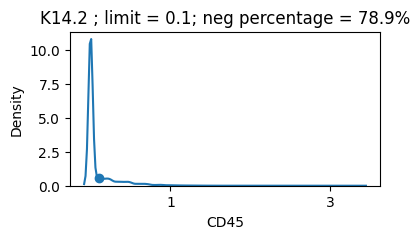

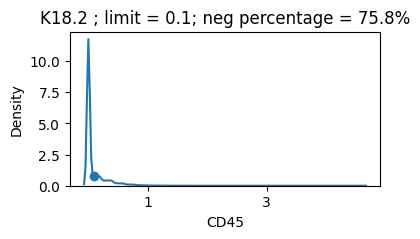

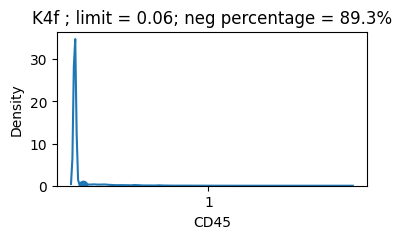

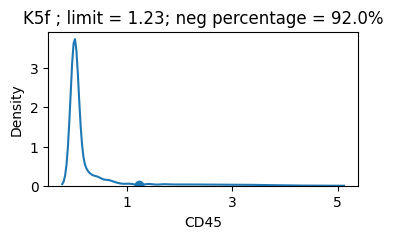

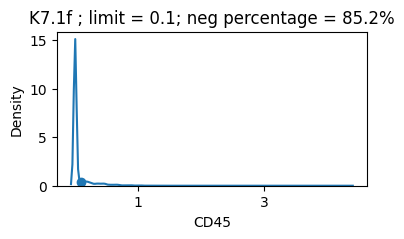

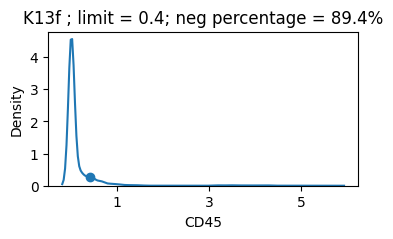

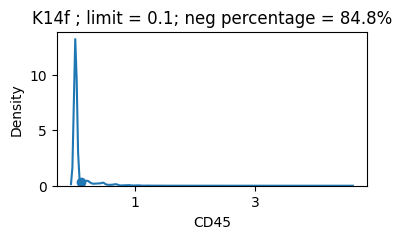

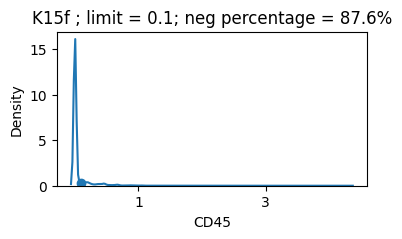

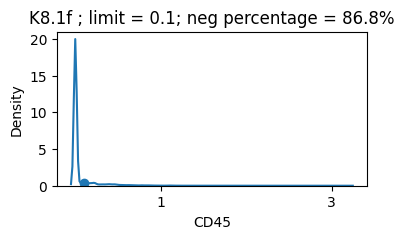

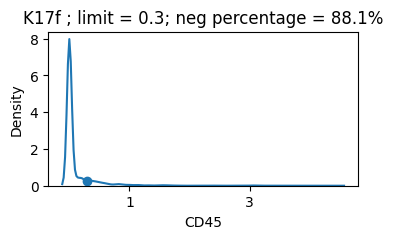

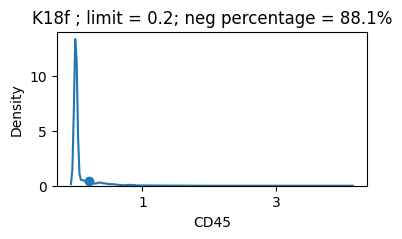

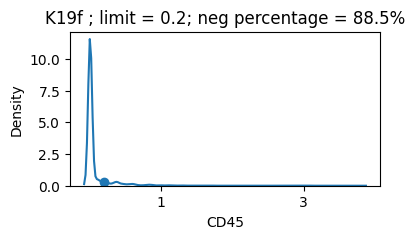

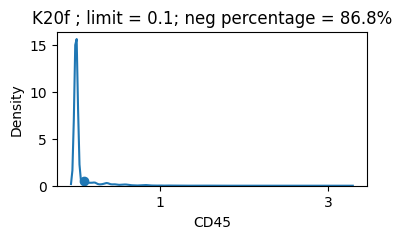

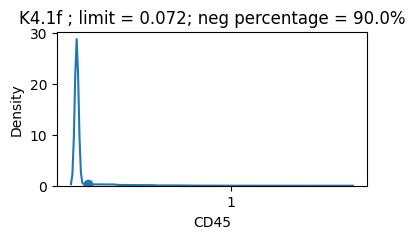

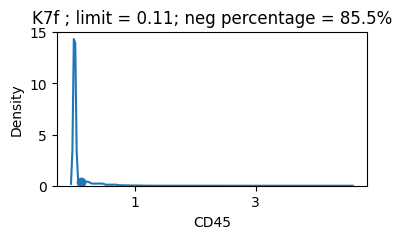

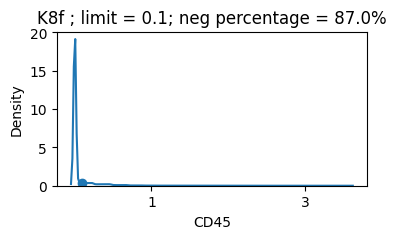

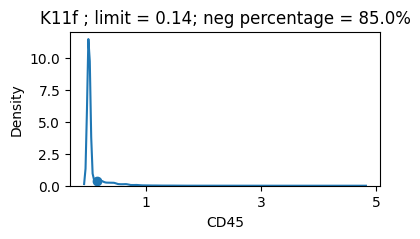

In [25]:
arr=[]
KCD45Neg_ind ,min_x, min_y = {},{},{}
neg_percentage={}
f = 'CD45'

xMins = {'1':1.87,'2':2.172,
        '3':0.98,'4':0.06,'5':1.23,
        '4.1':0.072,'7':0.11,'8':0.10,'11':0.14,

        '7.1':0.1,'13':0.4,'14':0.1,'15':0.1,
        # '7.3':0.1,'13.3':0.6,'14.3':0.1,'15.3':0.1,

        '17':0.3,'18':0.2,'19':0.2,'20':0.1,'8.1':0.1,
        # '17.3':0.3,'18.3':0.2,'19.3':0.2,'20.3':0.1,'8.3':0.1,

        '14.2':0.1,'18.2':0.1,


}

for j,[i, K] in enumerate(k.items()):
    if 'f' not in i and '.2'not in i: #skip unfitted regular samples (we would use fitted index later)
        continue
    xMin = xMins[ i if 'f' not in i else i[:-1]] 

    # xMin = xMins[ i]
    



    if xMin == None: #there  are 2 defined dist and minima can be found not manually
         min_x[i],min_y[i] = splitInversePDF(K,i,'CD45')
    else:
        # min_x[i] = xMin
        # if visualize:
        min_x[i],min_y[i] = splitInversePDF(K,i,f,min_x = xMin)
    KCD45Neg_ind[i]= K[K[f]<min_x[i]].index
    neg_percentage[i] = np.round(len(K[K[f]<min_x[i]])/len(K),3)*100
    arr.append([i,f,neg_percentage[i]])
    print(f'k{i}; value with highest *inverse* probability:', min_x[i])
saveCsv_split(dir_plots,'neg_pecentage',arr)

visualize = True
if visualize:
    for [i,f,_]  in arr:
    # for i in k.keys():
        K = k[i].copy()
        # ind = KCD45Neg_ind[i]
        # min_x = loc[KCD45Neg_ind[i]].min()
        neg_percentage_ = np.round(len(K[K[f]<min_x[i]])/len(K),3)*100
       
            
        plotSplit(k[i][f].copy(),i,min_x[i],min_y[i],settings,neg_percentage_,Figname = '_cd45_split',log = False,)#XSIZE=10
       
visualize = False


In [26]:
15537 in k['18']['ind']

True

In [27]:
# if visualize:
#   colors = cm.rainbow(np.linspace(0, 1, len (k.keys())))
#   fig, ax = plt.subplots(1,2,figsize=(10,3))
#   for i, K in k.items(): 
#     #   
#     j =  names['figures'][int(i)-1]-1 
#     sns.histplot(K.CD45,color=colors[int(i)-1],label='T'+i,stat='density',element='step',fill=False,ax = ax[j])
#     ax[j].legend(loc='upper center',bbox_to_anchor=(1,1))
#     ax[j].set_yscale('log')
#     ax[j].title.set_text('cd45 split histplot')
#   plt.savefig(dir_plots+'cd45_split_histplot.svg', format="svg", bbox_inches="tight", pad_inches=0.2)

 


#   fig, ax = plt.subplots(1,2,figsize=(12,3))
#   for [i, K],[h, KCD45Neg] in zip( k.items(),kCD45Neg.items()):
#       j =  names['figures'][int(i)-1]-1 
#       sns.kdeplot(K.CD45,color=colors[int(i)-1],label='T'+i,ax = ax[j])
#       sns.kdeplot(K.CD45,color=colors[int(i)-1],ls='--',label='T'+i+' CD45-',ax = ax[j])
#       ax[j].legend(loc='upper center',bbox_to_anchor=(1,1))
#       ax[j].set_yscale('log')
#       ax[j].title.set_text('cd45 split kdeplot')
#   plt.savefig(dir_plots+'cd45_split_kdeplot.svg', format="svg", bbox_inches="tight", pad_inches=0.2)

      

Continue only with CD45 neg population

1. delete cd45+ population and continue with k  = kCD45Neg
2. delete cd45 feature from data 



In [28]:

dict ={}

for i, K in k.items():
    # if i !='4f':
    #     continue
    
    # if 'f' not in i :
    #     continue
   
    
    j = i if ('f' in i) or ('.2'  in i) else i+'f'
    # print(i,j)
    # print(i,K.loc[KCD45Neg_ind[j]]['CD45'].max())
    # j=i
    newK = K.loc[KCD45Neg_ind[j]].copy()\
        # .drop('CD45',axis=1) #\
    # .reset_index(drop=True)
    # neg_percentage = np.round(len(K[K[f]<min_x[i]])/len(K),3)*100
    print(f'k{i}: CD45+ removal - initial: {len(K)}, final:{len(newK)} ({np.round(len(newK)/len(K)*100,2)}%)')
    dict[i ] = newK
    newK=None
    names[i]  = removeFeatures(names[i].copy(),['CD45'])
k =None; k=dict 
names['all']  = removeFeatures(names[i].copy(),['CD45'])
# dict ={}
# for i, K in k.items():
  

#   # remove from features lists(names)
#   N = names[i]
#   for j, sublist in N.items():
#     try:
#       sublist.remove('CD45')
#     except:
#       pass
#     N[j] = sublist
#   dict[i] = N
# #   remove index 3 and copy to new dict
# # names['figures'].pop(3-1)
# dict['figures'] = names['figures']
# # names['norm_type'].pop(3-1)
# dict['norm_type'] = names['norm_type']
# dict['all'] = names['all']
# del names; names=dict 

k4: CD45+ removal - initial: 374890, final:334653 (89.27%)
k5: CD45+ removal - initial: 68765, final:63288 (92.04%)
k4.1: CD45+ removal - initial: 110472, final:99433 (90.01%)
k7: CD45+ removal - initial: 66748, final:57086 (85.52%)
k8: CD45+ removal - initial: 124737, final:108526 (87.0%)
k11: CD45+ removal - initial: 38868, final:33054 (85.04%)
k7.1: CD45+ removal - initial: 43418, final:36971 (85.15%)
k13: CD45+ removal - initial: 24167, final:21614 (89.44%)
k14: CD45+ removal - initial: 58303, final:49453 (84.82%)
k15: CD45+ removal - initial: 40010, final:35065 (87.64%)
k14.2: CD45+ removal - initial: 31953, final:25226 (78.95%)
k17: CD45+ removal - initial: 36988, final:32598 (88.13%)
k18: CD45+ removal - initial: 44601, final:39295 (88.1%)
k19: CD45+ removal - initial: 63345, final:56035 (88.46%)
k20: CD45+ removal - initial: 68763, final:59710 (86.83%)
k8.1: CD45+ removal - initial: 122182, final:106043 (86.79%)
k18.2: CD45+ removal - initial: 41179, final:31220 (75.82%)
k4f: C

In [29]:
k.keys()
15537 in k['18']['ind']

True

# Normalize using new method on all intercellular markers

save pre normalized data

In [30]:
# for i, K in k.items():
#     try:
#       del dict;dict ={}
#     except:
#         dict ={}
#     dict['k'] = K
#     pickle_dump('k'+i+'_prenorm_dict', dict,dir_data)

In [31]:
# for i, K in k.items():
#     k[i]['by_sample'] = float(i)
#     names[i]['ind'] = k[i]['by_sample']

# # merged dataset is normalize with H3 and plot by its own fig
# # names['norm_type'].append(2)
# # names['figures'].append(4)

# # uncommon features between samples and samples index to append

# b23 = ['p53', 'ZEB1' ];b23ind = [ '4', '5', '4.1', '7', '8', '11']
# b123 = ['NCad','ECad','panKeratin',  'p53', 'ZEB1'];b123ind = ['1', '2', '4', '5', '4.1', '7', '8', '11']
# # b4= ['p53', 'ZEB1' ];b4ind = [ '4', '4.1']


# # remove the uncommonFeatures from the  mutual list, create data-dict without uncommonFeatures and append into single dataset
# names['b123']  = removeFeatures(names['all'].copy(),b123)
# k['b123'],names['b123']['ind'] = createAppendDataset(names['b123'],getAppendDict(k.copy(),b123ind,b123 ),n=1771)

# names['b23']  = removeFeatures(names['all'].copy(),b23)
# k['b23'],names['b23']['ind'] = createAppendDataset(names['b23'],getAppendDict(k.copy(),b23ind,b23 ),n=2000)

# # names['b4']  = removeFeatures(names['all'].copy(),b4)
# # k['b4'],names['b4']['ind'] = createAppendDataset(names['b4'],getAppendDict(k.copy(),b4ind,b4 ),n=5000)


2 step normalization:

1- normalize gardient (TBD)

1- normalize using core

insight: since its the minima multiple rus with same effect as one run

note: features to norm (i.e names[i]['ToNorm']) are different on each sample


        
        
        # FIRST STEP - normalize_gardient by core 
        # SECOND STEP - normalize ToNorm fetures by the core features ['H3.3','H4']

In [32]:
def normalize_data(k,sample,names):
    arr_ =[]
    for i, K in k.items():
        # i = '7.1';K = k[i]
        norm_type = 2 if i not in ['1','2'] else 1
        ToNorm = names[i]['ToNorm'].copy()
        coreFetures = ['H4','H3', 'H3.3'] if norm_type==2 else ['H3.3','H4']

        
        if norm_type==1:
          K[ToNorm]=NormalizeNew2(K.copy(),ToNorm)
          
        elif norm_type==2:
          K[ToNorm] = NormalizeNew(K.copy(),ToNorm)
        K[ToNorm]= Mean_Core_normalization(K.copy(), ToNorm,coreFetures=coreFetures)

        if (K.columns != k[i].columns).any():
           print('eror')
           break
        k[i] = K 
        arr_.append(f'k{i}:{norm_type}')
    print (f'normalized with method: {arr_}');arr_ = None
    return k

k = normalize_data(k.copy(),'k',names)

normalized with method: ['k4:2', 'k5:2', 'k4.1:2', 'k7:2', 'k8:2', 'k11:2', 'k7.1:2', 'k13:2', 'k14:2', 'k15:2', 'k14.2:2', 'k17:2', 'k18:2', 'k19:2', 'k20:2', 'k8.1:2', 'k18.2:2', 'k4f:2', 'k5f:2', 'k7.1f:2', 'k13f:2', 'k14f:2', 'k15f:2', 'k8.1f:2', 'k17f:2', 'k18f:2', 'k19f:2', 'k20f:2', 'k4.1f:2', 'k7f:2', 'k8f:2', 'k11f:2']


# create batches

subsample original data; verify n<=5000 

reset index 

load both 14 &14.1 from same index file (same indexes)

add columns so we would know from which samp any data arrived from

In [33]:
# kk = k.copy()
print(k.keys())


dict_keys(['4', '5', '4.1', '7', '8', '11', '7.1', '13', '14', '15', '14.2', '17', '18', '19', '20', '8.1', '18.2', '4f', '5f', '7.1f', '13f', '14f', '15f', '8.1f', '17f', '18f', '19f', '20f', '4.1f', '7f', '8f', '11f'])


In [34]:

subsample = True
if subsample:
    min_size = min([len(k[i]) for i in k.keys()])
    for i in k.keys():
        

        # print(i)
        # ind  = int(float(i)) if i!='4.1' and i!='7.1'  else i
        # k[i] = subsample_k(k[i].copy(),i,dir_indexes,n=5000).reset_index(drop = True)
        
        # subsample using single index in both fitted and y=un fitted samples with same number such as 4,4f
        j = i if 'f' not in i else i[:-1] 

        try:k[i] = subsample_k(k[i].copy(),j,dir_indexes,n=min_size)
        except: 
            print(i)
            # subsample_k(k[i].copy(),j,dir_indexes,n=5000)
        
    print (list (k.keys()))
        # break
for i in k.keys():
    print(i,len(k[i]))

original size: 334653, new size: 21614 indexes saved to file
original size: 63288, new size: 21614 indexes saved to file
original size: 99433, new size: 21614 indexes saved to file
original size: 57086, new size: 21614 indexes saved to file
original size: 108526, new size: 21614 indexes saved to file
original size: 33054, new size: 21614 indexes saved to file
original size: 36971, new size: 21614 indexes saved to file
original size: 21614, file unchanged
original size: 49453, new size: 21614 indexes saved to file
original size: 35065, new size: 21614 indexes saved to file
original size: 25226, new size: 21614 indexes saved to file
original size: 32598, new size: 21614 indexes saved to file
original size: 39295, new size: 21614 indexes saved to file
original size: 56035, new size: 21614 indexes saved to file
original size: 59710, new size: 21614 indexes saved to file
original size: 106043, new size: 21614 indexes saved to file
original size: 31220, new size: 21614 indexes saved to file


In [35]:
print (list (k.keys()))

['4', '5', '4.1', '7', '8', '11', '7.1', '13', '14', '15', '14.2', '17', '18', '19', '20', '8.1', '18.2', '4f', '5f', '7.1f', '13f', '14f', '15f', '8.1f', '17f', '18f', '19f', '20f', '4.1f', '7f', '8f', '11f']


create batches
1. samples were  subsampled to a reasonable size (previous cell)
2. every sample is fully inside the batch  - so we know for each index were it came from
    1. (the index exists both in the batch and in the sample)

In [36]:
# uncommon features between samples and samples index to append
# from usefull_functions import *
b2345 = ['p53', 'ZEB1','NCad','MBD', 'CyclinB1', 'pRB' ];
b2345ind = [ f'{i}f' for i in ['4', '5', '4.1', '7', '8', '11',
            '7.1', '13','14','15',
            '8.1','17','18','19','20'] if f'{i}f' in k.keys()]
# b2345ind = [f'{i}f' for i in b2345ind]
print(b2345ind)
k['b2345'],names['b2345']= createAppendDataset(k.copy(),names['all'].copy(),b2345ind,b2345 )




['4f', '5f', '4.1f', '7f', '8f', '11f', '7.1f', '13f', '14f', '15f', '8.1f', '17f', '18f', '19f', '20f']
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [37]:

# b123 = ['NCad','ECad','panKeratin',  'p53', 'ZEB1'];b123ind = ['1', '2', '4', '5', '4.1', '7', '8', '11'] problematic since 1,2 with less than 5000samples
# b3 = ['p53', 'ZEB1','MBD', 'CyclinB1', 'pRB' ];b3ind = [  '4.1', '7', '8', '11']
# b2 = ['p53', 'ZEB1','MBD', 'CyclinB1', 'pRB'];b2ind = [  '4', '5']
# b4 = ['p53', 'ZEB1','NCad', 'CyclinB1', 'pRB' ];b4ind = [  '7.3', '13.3','14.3','15.3']
b5 = ['p53', 'ZEB1','NCad', 'CyclinB1', 'pRB' ];b5ind = [  '18','19']
k['b5'],names['b5']= createAppendDataset(k.copy(),names['all'].copy(),b5ind,b5 )



# remove the uncommonFeatures from the  mutual list, create data-dict without uncommonFeatures and append into single dataset

# k['b2345'],names['b2345']= createAppendDataset(k.copy(),names['all'].copy(),b2345ind,b2345 )
# k['b5'],names['b5']= createAppendDataset(k.copy(),names['all'].copy(),b5ind,b5 )

# k['b4'],names['b4']= createAppendDataset(k.copy(),names['all'].copy(),b4ind,b4 )
# k['b3'],names['b3']= createAppendDataset(k.copy(),names['all'].copy(),b3ind,b3 )
# k['b2'],names['b2']= createAppendDataset(k.copy(),names['all'].copy(),b2ind,b2 )




# # unitest
# K = k['b234'].copy()
# for i in np.unique(K['samp']):
#     i = str(int(i)) if i!=4.1 and i != 7.1 else str(float(i))

#     k_i = k[i].copy()
#     k_i_batch = K[K.samp == float(i)].copy()
    
#     tmp = [i for i in list(k_i.ind) if i not in list(k_i_batch.ind)] + [i for i in list(k_i_batch.ind) if i not in list(k_i.ind)]
#     print(i, len(k_i.ind),len(k_i_batch.ind),len(tmp))


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [38]:
# k.keys()
# k = kk.copy()
# names = names_.copy()
# kk = k.copy()
# names_ = names.copy()

In [39]:
# k = k1.copy()
# names = names1.copy()

# k1 = k.copy()
# names1 = names.copy()

adjusted

In [40]:
# k = k1.copy()
# names = names1.copy()

# adjusted = False
if adjusted:
    existing_keys = [i for i in k.keys() if os.path.exists(f"{dir_indexes}{i}a_indexes.p")]
    existing_keys = [i for i in k.keys() if (i in existing_keys)or('f' in i and i[:-1] in existing_keys)]


    try:
        existing_keys.remove('b2345')#doesnt work for batch with multiple samples of same index
    except:
        pass
    for i in existing_keys:
        # if 'f' not in i:
        #     continue
        i_adj = f'{i}a' if 'f' not in i else f'{i[:-1] }af'  
        
        

        K = k[i].copy()
        Len = len(k[i])
        # print(i_adj)
        # k[i_adj]= subsample_k(k[i].copy(),i_adj,dir_indexes)
        names[i_adj] = names[i].copy()
        del k[i];del names[i] #delete the not-adjusted data

        idx = pickle_load(f"{i_adj if 'f' not in i_adj else i_adj[:-1]}_indexes",dir_indexes)
        
        newIdx = [j[0] for j in [ K.index[K['ind']==i] for i in idx ] if len(j)>0]
        k[i_adj]=K.loc[newIdx].copy()
        print (f'original size: {Len}, new size: {len(k[i_adj])} indexes loaded from file')
        # del k[i];del names[i]
    
    try:
        b2345 = ['p53', 'ZEB1','NCad','MBD', 'CyclinB1', 'pRB' ];b2345a_ind = [f'{i[:-1]}af' for i in b2345ind]
        k['b2345a'],names['b2345a']= createAppendDataset(k.copy(),names['all'].copy(),b2345a_ind,b2345 )
    except:
        pass
print(k.keys())





4a_indexes ; loaded from file
original size: 21614, new size: 356 indexes loaded from file
5a_indexes ; loaded from file
original size: 21614, new size: 1624 indexes loaded from file
4.1a_indexes ; loaded from file
original size: 21614, new size: 1097 indexes loaded from file
7a_indexes ; loaded from file
original size: 21614, new size: 1751 indexes loaded from file
8a_indexes ; loaded from file
original size: 21614, new size: 939 indexes loaded from file
11a_indexes ; loaded from file
original size: 21614, new size: 2315 indexes loaded from file
7.1a_indexes ; loaded from file
original size: 21614, new size: 2680 indexes loaded from file
13a_indexes ; loaded from file
original size: 21614, new size: 4429 indexes loaded from file
14a_indexes ; loaded from file
original size: 21614, new size: 1960 indexes loaded from file
15a_indexes ; loaded from file
original size: 21614, new size: 2879 indexes loaded from file
14.2a_indexes ; loaded from file
original size: 21614, new size: 3848 inde

stroma

In [52]:


def find_index_by_comprison(df1,df2,samp_col = 'samp',ind_col = 'ind'):
    indexes = []
    for samp in df2[samp_col].unique():
        K2 = df2[df2[samp_col]==samp]
        K1 = df1[df1[samp_col]==samp]
        # find index of each K2[ind] in K1['ind']
        for i in K2.index:
            # print(K2.loc[i,'ind'],K1[K1['ind']==K2.loc[i,'ind']].index)
            indexes.append(K1[K1[ind_col]==K2.loc[i,ind_col]].index[0])
            
            
    idx= list(df1.index)
    wanted_idx = np.setdiff1d(idx,indexes)   
    print(f'original:{len(idx)}, result: {len(wanted_idx)}, extracted: {len(indexes)}')
         
    df3 = df1.loc[wanted_idx].copy()
    
    print(f'new df size: {len(df3)}')
    return df3

 

k['b2345s'] = find_index_by_comprison(k['b2345'].copy(),k['b2345a'].copy(),samp_col = 'samp',ind_col = 'ind')
names['b2345s'] = names['b2345a'].copy()
print(k.keys())

original:324210, result: 295027, extracted: 29183
new df size: 295027
dict_keys(['b2345', 'b5', '4a', '5a', '4.1a', '7a', '8a', '11a', '7.1a', '13a', '14a', '15a', '14.2a', '17a', '18a', '19a', '20a', '8.1a', '18.2a', '4af', '5af', '7.1af', '13af', '14af', '15af', '8.1af', '17af', '18af', '19af', '20af', '4.1af', '7af', '8af', '11af', 'b2345a', 'b2345s'])


In [42]:
# from usefull_functions import *

# b45 = ['NCad',      'p53', 'ZEB1', 'CyclinB1', 'pRB' ,  ];b45a_ind = [i[:-1] for i in b2345a_ind][5:]
# k['b45a'],names['b45a'] = createAppendDataset(k.copy(),names['all'].copy(),b45a_ind,b45 )

# print(b45a_ind)    # k['b2345a'],names['b2345a']= createAppendDataset(k.copy(),names['all'].copy(),b2345a_ind,b2345 )

In [43]:
# keys = list(k .keys()).copy()
# for i in keys:
#     if 'f' not in i :
#         continue
#     del k[i];del names[i]
# print(list(k.keys()))


In [44]:
# for i in k.keys():
#     if 'MBD' in k[i].columns:
#         print(i)

In [45]:
    # b2345a = ['p53', 'ZEB1','NCad','MBD', 'CyclinB1', 'pRB' ];b2345a_ind = [ '4a', '5a', '4.1a', '7a', '8a', '11a',
    #                                                         '7.1a', '13a','14a','15a']

    # # # b123 = ['NCad','ECad','panKeratin',  'p53', 'ZEB1'];b123ind = ['1', '2', '4', '5', '4.1', '7', '8', '11'] problematic since 1,2 with less than 5000samples
    # # b3 = ['p53', 'ZEB1','MBD', 'CyclinB1', 'pRB' ];b3ind = [  '4.1', '7', '8', '11']
    # # b2 = ['p53', 'ZEB1','MBD', 'CyclinB1', 'pRB'];b2ind = [  '4', '5']
    # # b4 = ['p53', 'ZEB1','NCad', 'CyclinB1', 'pRB' ];b4ind = [  '7.3', '13.3','14.3','15.3']


    # # remove the uncommonFeatures from the  mutual list, create data-dict without uncommonFeatures and append into single dataset
    # print('loaded b234a')
    # k['b2345a'],names['b2345a'] = createAppendDataset(k.copy(),names['all'].copy(),b2345a_ind,b2345a )

save pre-scaled data to file

In [46]:
for i, K in k.items():
    dict = None;dict ={}
    dict['k'] = K
    pickle_dump('k'+i+'_prescaled_dict', dict,dir_data)
    
    dict = None;dict ={}
    dict = names[i]
    pickle_dump('k'+i+'_names_dict', dict,dir_data)

# Scale data 

using mean, std (whiten data) - achieve std close to 1 mean close to 0

In [47]:

for i, K in k.items():

    cols = names[i]['NamesAll']
    
    k[i][cols] = scale_data(K.copy(),cols)
    print (f'k{i} scaled')
    # print(K.std().to_frame().T)
# the index numbers are unfortunately passes into scaling and norm
# after scaling rturn the unscled index numbers

# for i, K in k.items():
#     k[i]['by_sample'] = names[i]['by_sample']
#     k[i]['Ind'] = names[i]['Ind']
#     del  names[i]['by_sample'];del names[i]['Ind'] 
#     # names[i]['by_sample'] = None;names[i]['Ind'] = None

    
    


kb2345 scaled
kb5 scaled
k4a scaled
k5a scaled
k4.1a scaled
k7a scaled
k8a scaled
k11a scaled
k7.1a scaled
k13a scaled
k14a scaled
k15a scaled
k14.2a scaled
k17a scaled
k18a scaled
k19a scaled
k20a scaled
k8.1a scaled
k18.2a scaled
k4af scaled
k5af scaled
k7.1af scaled
k13af scaled
k14af scaled
k15af scaled
k8.1af scaled
k17af scaled
k18af scaled
k19af scaled
k20af scaled
k4.1af scaled
k7af scaled
k8af scaled
k11af scaled
kb2345a scaled


In [48]:

if visualize:
    plot_hist(k,names['all']['NamesAll'],names['figures'],settings,
        func = sns.kdeplot,title = 'Normalized + Scaled',Figname = '2_Hist_normalized_scaled_' )     

# final
1. Save data to file (pickle)
2. drop sample 3
3. convert images to pdf


In [49]:
# for i, K in k.items():
  
#   print(len(list(K.columns)))
#   print(len(names[i]['NamesAll']))

kInd = list(k.keys());
if '3'in kInd:kInd.remove('3')
for i in kInd:
    dict = None;dict ={}
    dict = names[i]
    pickle_dump('k'+i+'_names_dict', dict,dir_data)

    dict = None;dict ={}
    K = k[i].copy()\
            .reset_index(drop = True)
    # if (K.index == range(len(K))).all():
    dict['k'] = K
    pickle_dump(f'k{i}_dict', dict,dir_data)
    print (f'k{i}; samples = {len(K)}, fetures =  {len(K.columns)}; saved to file')

end = time.process_time()
print ('total run time =', end-start )

kb2345; samples = 324210, fetures =  37; saved to file
kb5; samples = 43228, fetures =  38; saved to file
k4a; samples = 356, fetures =  38; saved to file
k5a; samples = 1624, fetures =  38; saved to file
k4.1a; samples = 1097, fetures =  37; saved to file
k7a; samples = 1751, fetures =  37; saved to file
k8a; samples = 939, fetures =  37; saved to file
k11a; samples = 2315, fetures =  37; saved to file
k7.1a; samples = 2680, fetures =  38; saved to file
k13a; samples = 4429, fetures =  38; saved to file
k14a; samples = 1960, fetures =  38; saved to file
k15a; samples = 2879, fetures =  38; saved to file
k14.2a; samples = 3848, fetures =  38; saved to file
k17a; samples = 2503, fetures =  38; saved to file
k18a; samples = 2514, fetures =  38; saved to file
k19a; samples = 1543, fetures =  38; saved to file
k20a; samples = 1706, fetures =  38; saved to file
k8.1a; samples = 1003, fetures =  38; saved to file
k18.2a; samples = 3101, fetures =  39; saved to file
k4af; samples = 302, fetur

In [50]:
# K = k['b45a'].copy()
# existing_keys = K['samp'].unique().tolist()
#     # # keys.remove('b2345')
# for i in existing_keys:
#     print(i,len(K[K['samp']==i]))

# print (K.keys())
# # # 4.0 4979
# # # 5.0 4714
# # # 4.1 4964
# # # 7.0 4583
# # # 8.0 4646
# # # 11.0 3493
# # # 7.1 4555
# # # 13.0 4414
# # # 14.0 4505
# # # 15.0 4626
# # # 8.1 4791
# # # 17.0 3782
# # # 18.0 4570
# # # 19.0 4004
# # # 20.0 4755

In [51]:
k.keys()
k['b5']['samp'].unique()
len(k['b5'])

43228